In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    classification_report,
    roc_auc_score,
    precision_recall_curve,
    confusion_matrix
)

import warnings
warnings.filterwarnings("ignore")

plt.rcParams["figure.figsize"] = (8, 5)


In [2]:
df = pd.read_csv("creditcard.csv")

df.head()


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
print("Shape:", df.shape)
df.info()


Shape: (284807, 31)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  flo

In [4]:
class_counts = df["Class"].value_counts()

print(class_counts)
print("\nFraud Percentage:")
print(class_counts / len(df) * 100)


Class
0    284315
1       492
Name: count, dtype: int64

Fraud Percentage:
Class
0    99.827251
1     0.172749
Name: count, dtype: float64


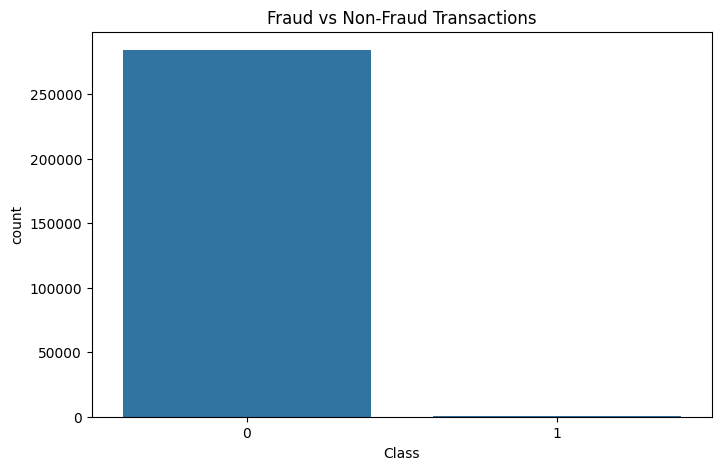

In [5]:
sns.countplot(x="Class", data=df)
plt.title("Fraud vs Non-Fraud Transactions")
plt.show()


In [6]:
df.isnull().sum().max()


np.int64(0)

In [7]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

df["scaled_amount"] = scaler.fit_transform(df[["Amount"]])
df["scaled_time"] = scaler.fit_transform(df[["Time"]])

df.drop(["Amount", "Time"], axis=1, inplace=True)


In [8]:
X = df.drop("Class", axis=1)
y = df["Class"]

print(X.shape, y.shape)


(284807, 30) (284807,)


In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    stratify=y,
    random_state=42
)


In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score

lr = LogisticRegression(
    class_weight="balanced",
    max_iter=1000
)

lr.fit(X_train, y_train)

y_pred_lr = lr.predict(X_test)
y_prob_lr = lr.predict_proba(X_test)[:, 1]

print(classification_report(y_test, y_pred_lr))
print("ROC-AUC:", roc_auc_score(y_test, y_prob_lr))


              precision    recall  f1-score   support

           0       1.00      0.98      0.99     56864
           1       0.06      0.92      0.11        98

    accuracy                           0.98     56962
   macro avg       0.53      0.95      0.55     56962
weighted avg       1.00      0.98      0.99     56962

ROC-AUC: 0.9721669425367221


In [11]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(
    n_estimators=100,
    class_weight="balanced",
    random_state=42
)

rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)
y_prob_rf = rf.predict_proba(X_test)[:, 1]

print(classification_report(y_test, y_pred_rf))
print("ROC-AUC:", roc_auc_score(y_test, y_prob_rf))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.96      0.76      0.85        98

    accuracy                           1.00     56962
   macro avg       0.98      0.88      0.92     56962
weighted avg       1.00      1.00      1.00     56962

ROC-AUC: 0.9580765743973446


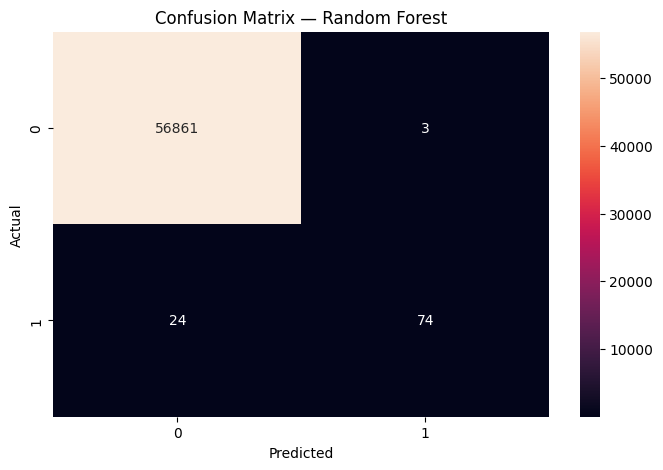

In [12]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_rf)

sns.heatmap(cm, annot=True, fmt="d")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix — Random Forest")
plt.show()


In [13]:
# =========================
# PHASE 2 — AUTOENCODER
# =========================


In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, roc_auc_score, precision_recall_curve, auc

import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense


In [15]:
df = pd.read_csv("creditcard.csv")
df.head()


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [16]:
X = df.drop("Class", axis=1)
y = df["Class"]

print("Fraud ratio:", y.mean())


Fraud ratio: 0.001727485630620034


In [17]:
X_normal = X[y == 0]
X_fraud  = X[y == 1]

X_train, X_test_normal = train_test_split(
    X_normal, test_size=0.2, random_state=42
)

X_test = pd.concat([X_test_normal, X_fraud])
y_test = np.concatenate([
    np.zeros(len(X_test_normal)),
    np.ones(len(X_fraud))
])


In [18]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.transform(X_test)


In [19]:
input_dim = X_train_scaled.shape[1]

input_layer = Input(shape=(input_dim,))

encoded = Dense(32, activation="relu")(input_layer)
encoded = Dense(16, activation="relu")(encoded)

decoded = Dense(32, activation="relu")(encoded)
decoded = Dense(input_dim, activation="linear")(decoded)

autoencoder = Model(inputs=input_layer, outputs=decoded)
autoencoder.compile(
    optimizer="adam",
    loss="mse"
)

autoencoder.summary()


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 30)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 32)                  │             992 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 32)                  │             544 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 30)                  │             990 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,054 (11.93 KB)

 Trainable params: 3,054 (11.93 KB)

 Non-trainable params: 0 (0.00 B)

In [21]:
history = autoencoder.fit(
    X_train_scaled,
    X_train_scaled,
    epochs=20,
    batch_size=256,
    shuffle=True,
    validation_split=0.1,
    verbose=1
)
X_test_pred = autoencoder.predict(X_test_scaled)

reconstruction_error = np.mean(
    np.square(X_test_scaled - X_test_pred),
    axis=1
)


Epoch 1/20
800/800 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 0.0602 - val_loss: 0.0631
Epoch 2/20
800/800 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.0591 - val_loss: 0.0606
Epoch 3/20
800/800 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 0.0578 - val_loss: 0.0617
Epoch 4/20
800/800 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 0.0571 - val_loss: 0.0585
Epoch 5/20
800/800 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - loss: 0.0562 - val_loss: 0.0584
Epoch 6/20
800/800 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - loss: 0.0554 - val_loss: 0.0590
Epoch 7/20
800/800 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 0.0547 - val_loss: 0.0575
Epoch 8/20
800/800 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 0.0540 - val_loss: 0.0568
Epoch 9/20
800/800 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 0.0532 - val_loss: 0.0554
Epoch 10/20
800/800 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.0525 - val_loss: 0.0544
Epoch 11/20
800/800 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 0.0518 - val_loss: 0.0566
Epoch 12/20
800/800 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step

In [22]:
X_test_pred = autoencoder.predict(X_test_scaled)

reconstruction_error = np.mean(
    np.square(X_test_scaled - X_test_pred),
    axis=1
)


1793/1793 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step


In [23]:
threshold = np.percentile(reconstruction_error, 95)
threshold


np.float64(0.16779263186109805)

In [24]:
y_pred = (reconstruction_error > threshold).astype(int)


In [25]:
print(classification_report(y_test, y_pred, digits=4))

roc = roc_auc_score(y_test, reconstruction_error)
print("ROC-AUC:", roc)

precision, recall, _ = precision_recall_curve(y_test, reconstruction_error)
pr_auc = auc(recall, precision)
print("PR-AUC:", pr_auc)


              precision    recall  f1-score   support

         0.0     0.9986    0.9568    0.9772     56863
         1.0     0.1440    0.8394    0.2458       492

    accuracy                         0.9558     57355
   macro avg     0.5713    0.8981    0.6115     57355
weighted avg     0.9912    0.9558    0.9710     57355

ROC-AUC: 0.9384447271569423
PR-AUC: 0.7934519406209477


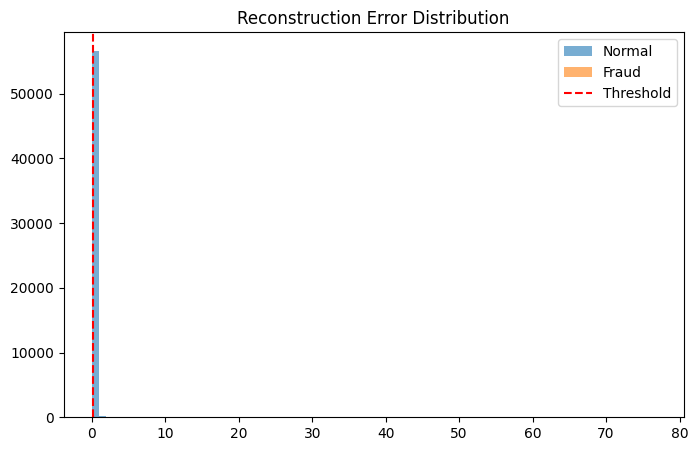

In [26]:
plt.figure(figsize=(8,5))
plt.hist(reconstruction_error[y_test == 0], bins=50, alpha=0.6, label="Normal")
plt.hist(reconstruction_error[y_test == 1], bins=50, alpha=0.6, label="Fraud")
plt.axvline(threshold, color="red", linestyle="--", label="Threshold")
plt.legend()
plt.title("Reconstruction Error Distribution")
plt.show()


In [30]:
### GENERATIVE AI (VAE-BASED FRAUD SIMULATION) ###

In [43]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers


In [44]:
df = pd.read_csv("creditcard.csv")

X = df.drop("Class", axis=1)
y = df["Class"]

X_normal = X[y == 0]

X_train, _ = train_test_split(X_normal, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)


In [45]:
df.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [46]:
class Sampling(layers.Layer):
    def call(self, inputs):
        z_mean, z_log_var = inputs
        epsilon = tf.random.normal(shape=tf.shape(z_mean))
        return z_mean + tf.exp(0.5 * z_log_var) * epsilon


In [47]:
input_dim = X_train_scaled.shape[1]
latent_dim = 8

encoder_inputs = keras.Input(shape=(input_dim,))
x = layers.Dense(32, activation="relu")(encoder_inputs)
x = layers.Dense(16, activation="relu")(x)

z_mean = layers.Dense(latent_dim, name="z_mean")(x)
z_log_var = layers.Dense(latent_dim, name="z_log_var")(x)
z = Sampling()([z_mean, z_log_var])

encoder = keras.Model(
    encoder_inputs, [z_mean, z_log_var, z], name="encoder"
)


In [48]:
latent_inputs = keras.Input(shape=(latent_dim,))
x = layers.Dense(16, activation="relu")(latent_inputs)
x = layers.Dense(32, activation="relu")(x)
decoder_outputs = layers.Dense(input_dim, activation="linear")(x)

decoder = keras.Model(latent_inputs, decoder_outputs, name="decoder")


In [49]:
class VAE(keras.Model):
    def __init__(self, encoder, decoder, **kwargs):
        super().__init__(**kwargs)
        self.encoder = encoder
        self.decoder = decoder
        self.total_loss_tracker = keras.metrics.Mean(name="loss")
        self.reconstruction_loss_tracker = keras.metrics.Mean(
            name="reconstruction_loss"
        )
        self.kl_loss_tracker = keras.metrics.Mean(name="kl_loss")

    @property
    def metrics(self):
        return [
            self.total_loss_tracker,
            self.reconstruction_loss_tracker,
            self.kl_loss_tracker,
        ]

    def train_step(self, data):
        if isinstance(data, tuple):
            data = data[0]

        with tf.GradientTape() as tape:
            z_mean, z_log_var, z = self.encoder(data)
            reconstruction = self.decoder(z)

            reconstruction_loss = tf.reduce_mean(
                tf.reduce_sum(tf.square(data - reconstruction), axis=1)
            )
            kl_loss = -0.5 * tf.reduce_mean(
                tf.reduce_sum(
                    1 + z_log_var - tf.square(z_mean) - tf.exp(z_log_var),
                    axis=1,
                )
            )
            total_loss = reconstruction_loss + 0.001 * kl_loss

        grads = tape.gradient(total_loss, self.trainable_weights)
        self.optimizer.apply_gradients(zip(grads, self.trainable_weights))

        self.total_loss_tracker.update_state(total_loss)
        self.reconstruction_loss_tracker.update_state(reconstruction_loss)
        self.kl_loss_tracker.update_state(kl_loss)
        return {
            "loss": self.total_loss_tracker.result(),
            "reconstruction_loss": self.reconstruction_loss_tracker.result(),
            "kl_loss": self.kl_loss_tracker.result(),
        }


In [50]:
vae = VAE(encoder, decoder)
vae.compile(optimizer=keras.optimizers.Adam())

vae.fit(
    X_train_scaled,
    epochs=30,
    batch_size=256,
    shuffle=True,
    verbose=1
)


Epoch 1/30
889/889 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - kl_loss: 24.6796 - loss: 24.7405 - reconstruction_loss: 24.7158
Epoch 2/30
889/889 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - kl_loss: 65.6314 - loss: 15.8332 - reconstruction_loss: 15.7676
Epoch 3/30
889/889 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - kl_loss: 85.3940 - loss: 12.9667 - reconstruction_loss: 12.8813
Epoch 4/30
889/889 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - kl_loss: 91.1189 - loss: 11.5658 - reconstruction_loss: 11.4747
Epoch 5/30
889/889 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - kl_loss: 91.5300 - loss: 10.7351 - reconstruction_loss: 10.6436
Epoch 6/30
889/889 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - kl_loss: 90.9978 - loss: 10.0950 - reconstruction_loss: 10.0040
Epoch 7/30
889/889 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - kl_loss: 90.7329 - loss: 9.4936 - reconstruction_loss: 9.4028
Epoch 8/30
889/889 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - kl_loss: 89.1976 - loss: 8.9953 - reconstruction_loss: 8.9061
Epoch 9/30
889/889 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - kl_los

In [51]:
# Number of synthetic samples
n_samples = 5000

# Sample from latent space
z_fake = np.random.normal(size=(n_samples, latent_dim))

# Decode to transaction space
synthetic_transactions = decoder.predict(z_fake)

synthetic_transactions.shape


157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


(5000, 30)

In [52]:
# Reconstruction via Phase-2 autoencoder
synthetic_recon = autoencoder.predict(synthetic_transactions)

# Reconstruction error
synthetic_error = np.mean(
    np.square(synthetic_transactions - synthetic_recon),
    axis=1
)


157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


In [53]:
# Real fraud transactions
X_fraud = X[y == 1]
X_fraud_scaled = scaler.transform(X_fraud)

fraud_recon = autoencoder.predict(X_fraud_scaled)

real_fraud_error = np.mean(
    np.square(X_fraud_scaled - fraud_recon),
    axis=1
)


16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


In [54]:
print("Mean Reconstruction Error")
print("Real Fraud     :", real_fraud_error.mean())
print("Synthetic Fraud:", synthetic_error.mean())


Mean Reconstruction Error
Real Fraud     : 19.863007021394576
Synthetic Fraud: 0.27973756


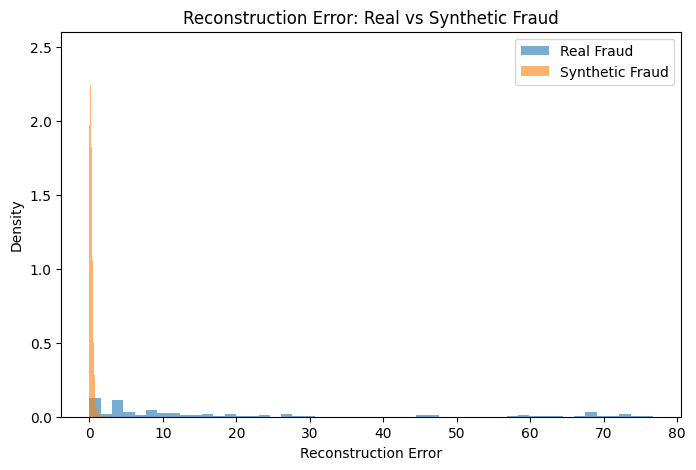

In [55]:
plt.figure(figsize=(8,5))

plt.hist(real_fraud_error, bins=50, density=True, alpha=0.6, label="Real Fraud")
plt.hist(synthetic_error, bins=50, density=True, alpha=0.6, label="Synthetic Fraud")

plt.xlabel("Reconstruction Error")
plt.ylabel("Density")
plt.title("Reconstruction Error: Real vs Synthetic Fraud")
plt.legend()
plt.show()


In [56]:
combined_errors = np.concatenate([real_fraud_error, synthetic_error])
threshold = np.percentile(combined_errors, 90)

print("Detection Rate @ Threshold")
print("Real Fraud     :", np.mean(real_fraud_error > threshold))
print("Synthetic Fraud:", np.mean(synthetic_error > threshold))


Detection Rate @ Threshold
Real Fraud     : 0.8089430894308943
Synthetic Fraud: 0.0304


In [57]:
#### RISK SCORING & DECISION ENGINE ####

In [63]:
# ===== PHASE 4 — RISK SCORING & DECISION ENGINE (SHAPE FIX) =====

import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Phase 1 output
fraud_probabilities = y_prob_rf

# Phase 2 output
reconstruction_errors = reconstruction_error

# --- ALIGN LENGTHS ---
n = min(len(fraud_probabilities), len(reconstruction_errors))

fraud_probabilities = fraud_probabilities[:n]
reconstruction_errors = reconstruction_errors[:n]

# Normalize anomaly score
scaler = MinMaxScaler()
anomaly_score_norm = scaler.fit_transform(
    reconstruction_errors.reshape(-1, 1)
).flatten()

# Risk score (0–100)
risk_score = (
    0.7 * fraud_probabilities +
    0.3 * anomaly_score_norm
) * 100
risk_score = np.round(risk_score, 2)

# Decision engine
def decision_engine(score):
    if score <= 30:
        return "APPROVE"
    elif score <= 70:
        return "VERIFY (OTP)"
    else:
        return "BLOCK"

decisions = [decision_engine(s) for s in risk_score]

# Final results
phase4_results = pd.DataFrame({
    "Fraud_Probability": fraud_probabilities,
    "Anomaly_Score": anomaly_score_norm,
    "Risk_Score": risk_score,
    "Decision": decisions
})

phase4_results.head()


,Fraud_Probability,Anomaly_Score,Risk_Score,Decision
0,0.0,0.000067,0.00,APPROVE
1,0.0,0.000099,0.00,APPROVE
2,0.0,0.000206,0.01,APPROVE
3,0.0,0.000331,0.01,APPROVE
4,0.0,0.000044,0.00,APPROVE


In [64]:
# Check if HIGH-RISK transactions exist #
phase4_results[phase4_results["Risk_Score"] > 70].head()


,Fraud_Probability,Anomaly_Score,Risk_Score,Decision
54064,1.0,0.000259,70.01,BLOCK


In [65]:
# Count decisions #
phase4_results["Decision"].value_counts()


Decision
APPROVE         56880
VERIFY (OTP)       81
BLOCK               1
Name: count, dtype: int64

In [66]:
# Check max risk score #
phase4_results["Risk_Score"].max()


np.float64(70.01)

In [69]:
risk_score_run1 = risk_score.copy()

risk_score_run2 = (
    0.7 * fraud_probabilities +
    0.3 * anomaly_score_norm
) * 100

risk_score_run2 = np.round(risk_score_run2, 2)

np.allclose(risk_score_run1, risk_score_run2)


True

In [72]:
### EXPLAINABILITY (WHY was this transaction flagged?) ###

In [78]:
import shap
from sklearn.linear_model import LogisticRegression


In [81]:
X = df.drop("Class", axis=1)   # features
y = df["Class"]               # target


In [82]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    stratify=y,
    random_state=42
)


In [83]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [84]:
import pandas as pd

X_train_scaled = pd.DataFrame(X_train_scaled, columns=X.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X.columns)


In [85]:
print(X_train_scaled.shape)
print(y_train.shape)


(227845, 30)
(227845,)


In [86]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000)
model.fit(X_train_scaled, y_train)


LogisticRegression(max_iter=1000)

In [87]:
print(model)


LogisticRegression(max_iter=1000)


In [88]:
import shap

explainer = shap.LinearExplainer(model, X_train_scaled)


In [89]:
shap_values = explainer.shap_values(X_test_scaled)


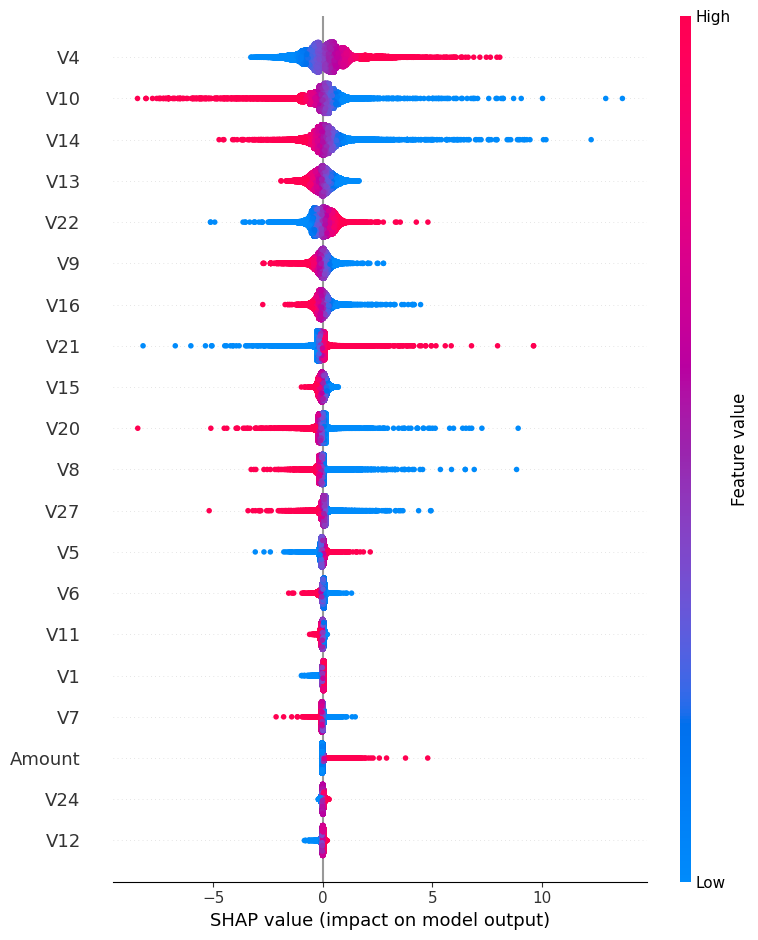

In [90]:
shap.summary_plot(shap_values, X_test_scaled)


In [1]:
### REAL-TIME DEPLOYMENT, MONITORING & ALERTING ###

In [2]:
import numpy as np
import pandas as pd
import joblib
from datetime import datetime
from tensorflow.keras.models import load_model


In [3]:
scaler = joblib.load("models/scaler.pkl")
fraud_model = joblib.load("models/fraud_model.pkl")
anomaly_scaler = joblib.load("models/anomaly_scaler.pkl")
autoencoder = load_model("models/autoencoder.h5")


FileNotFoundError: [Errno 2] No such file or directory: 'models/scaler.pkl'

In [5]:
import os

for root, dirs, files in os.walk("C:\\Users\\reddy"):
    for file in files:
        if file in ["scaler.pkl", "fraud_model.pkl", "anomaly_scaler.pkl", "autoencoder.h5"]:
            print(os.path.join(root, file))


C:\Users\reddy\anomaly_scaler.pkl
C:\Users\reddy\autoencoder.h5
C:\Users\reddy\fraud_model.pkl
C:\Users\reddy\scaler.pkl


In [6]:
scaler = joblib.load(
    r"C:\Users\reddy\Desktop\Fraud_Project\models\scaler.pkl"
)

fraud_model = joblib.load(
    r"C:\Users\reddy\Desktop\Fraud_Project\models\fraud_model.pkl"
)

anomaly_scaler = joblib.load(
    r"C:\Users\reddy\Desktop\Fraud_Project\models\anomaly_scaler.pkl"
)

autoencoder = load_model(
    r"C:\Users\reddy\Desktop\Fraud_Project\models\autoencoder.h5"
)


FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\reddy\\Desktop\\Fraud_Project\\models\\scaler.pkl'

In [7]:
import os
os.makedirs("models", exist_ok=True)


In [8]:
joblib.dump(scaler, "models/scaler.pkl")


NameError: name 'scaler' is not defined